# Setting Up

The first step to creating a ML model is having access to the dataset. Here we are importing the dataset from the google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Let's load the dataset and inspect the first few rows to understand its structure.
import pandas as pd
# Load the dataset
df_train = pd.read_csv("/content/drive/MyDrive/ANIL_ASSIGN/Titanic/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/ANIL_ASSIGN/Titanic/test.csv")
target = pd.read_csv("/content/drive/MyDrive/ANIL_ASSIGN/Titanic/gender_submission.csv")

# Data Exploration

To know available data in the dataset we will exploring the dataset using various methods available.

In [ ]:
# Show basic statistical summary of numerical columns in the df_train dataset
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Display the last 5 rows of the df_train dataset
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Calculate the total number of male passengers who survived by filtering rows where 'Sex' is 'male' and summing the 'Survived' column
df_train[df_train['Sex']=='male']['Survived'].sum()

109

In [ ]:
# Calculate the total number of female passengers who survived by filtering rows where 'Sex' is 'female' and summing the 'Survived' column
df_train[df_train['Sex']=='female']['Survived'].sum()

233

In [ ]:
# Count the number of missing values (NaNs) for each column in the df_train dataset
df_train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Drop rows 'Embarked' column from the df_train dataset
df_train = df_train.dropna(subset=['Embarked'])

# Data Visualization

In [ ]:
# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

Sex


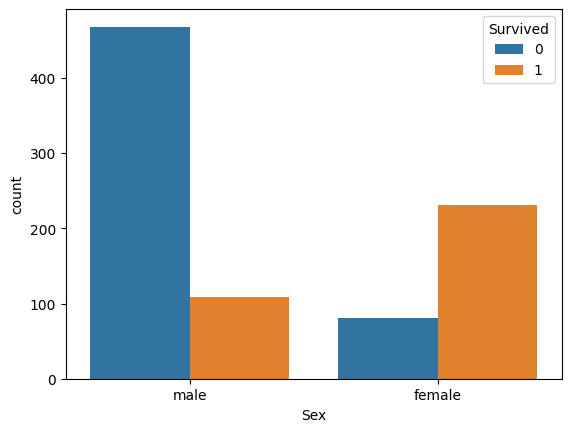


Embarked


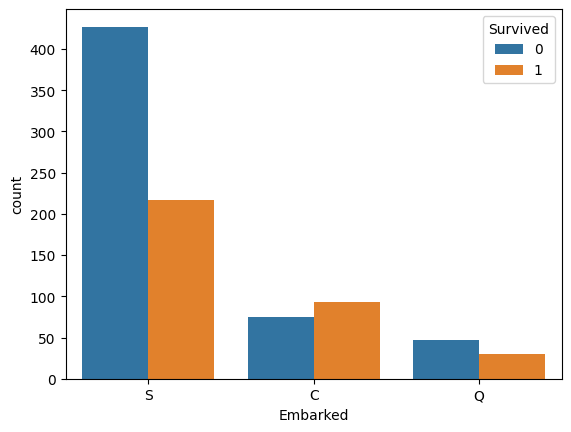


Pclass


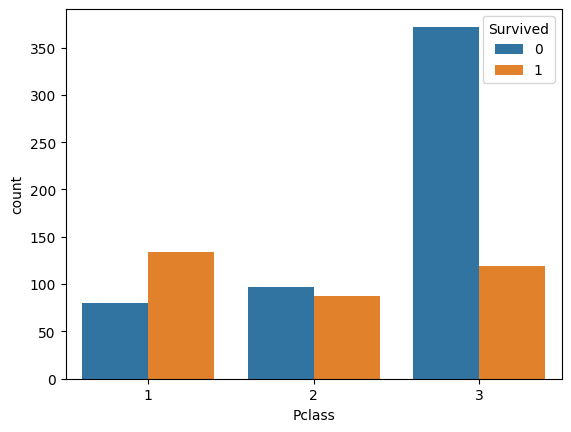


SibSp


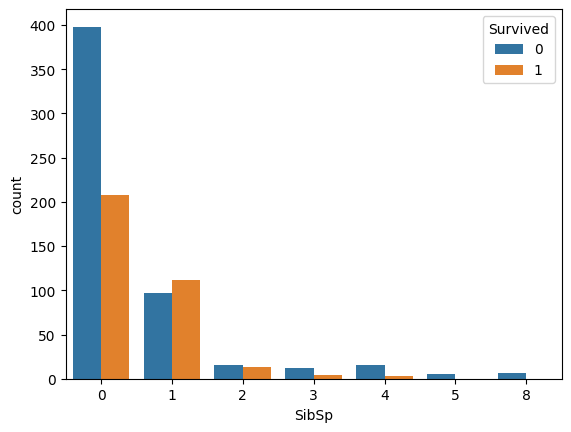


Parch


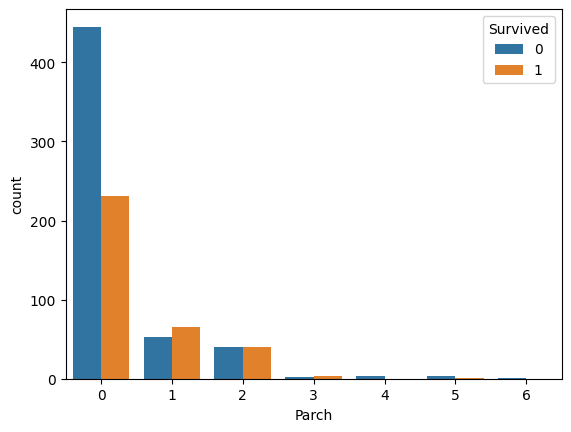

In [ ]:
for column_name in ['Sex','Embarked','Pclass', 'SibSp', 'Parch']:
    print(column_name)
    sns.countplot(data=df_train, x=column_name, hue='Survived')
    plt.show()
    print("")

<Axes: xlabel='Age', ylabel='Count'>

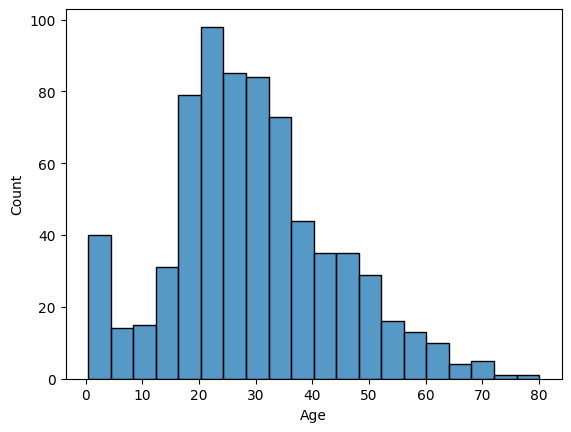

In [ ]:
sns.histplot(df_train['Age'])

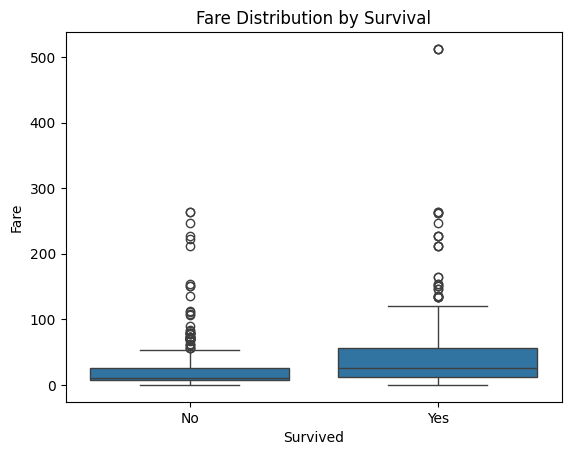

In [ ]:
sns.boxplot(data=df_train, x='Survived', y='Fare')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [ ]:
# Create the FamilySize column
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']

# Create the IsAlone column
df_train['IsAlone'] = (df_train['FamilySize'] == 0).astype(int)

FamilySize


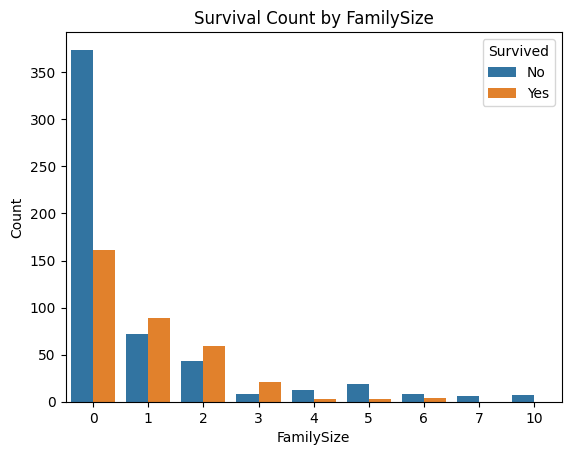


IsAlone


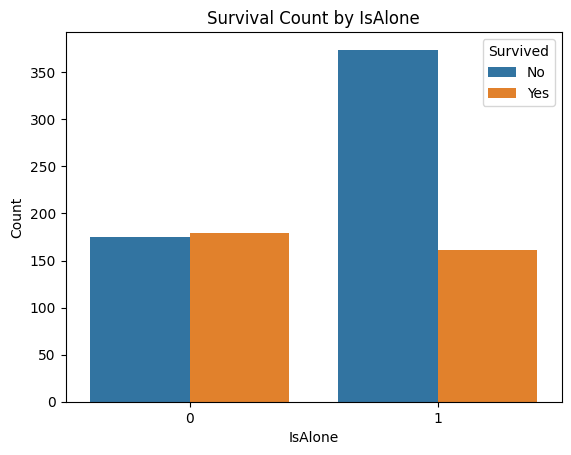

In [ ]:
for column_name in ['FamilySize', 'IsAlone']:
    print(column_name)
    sns.countplot(data=df_train, x=column_name, hue='Survived')
    plt.title(f'Survival Count by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.legend(title='Survived', labels=['No', 'Yes'])
    plt.show()
    print("")

FamilySize


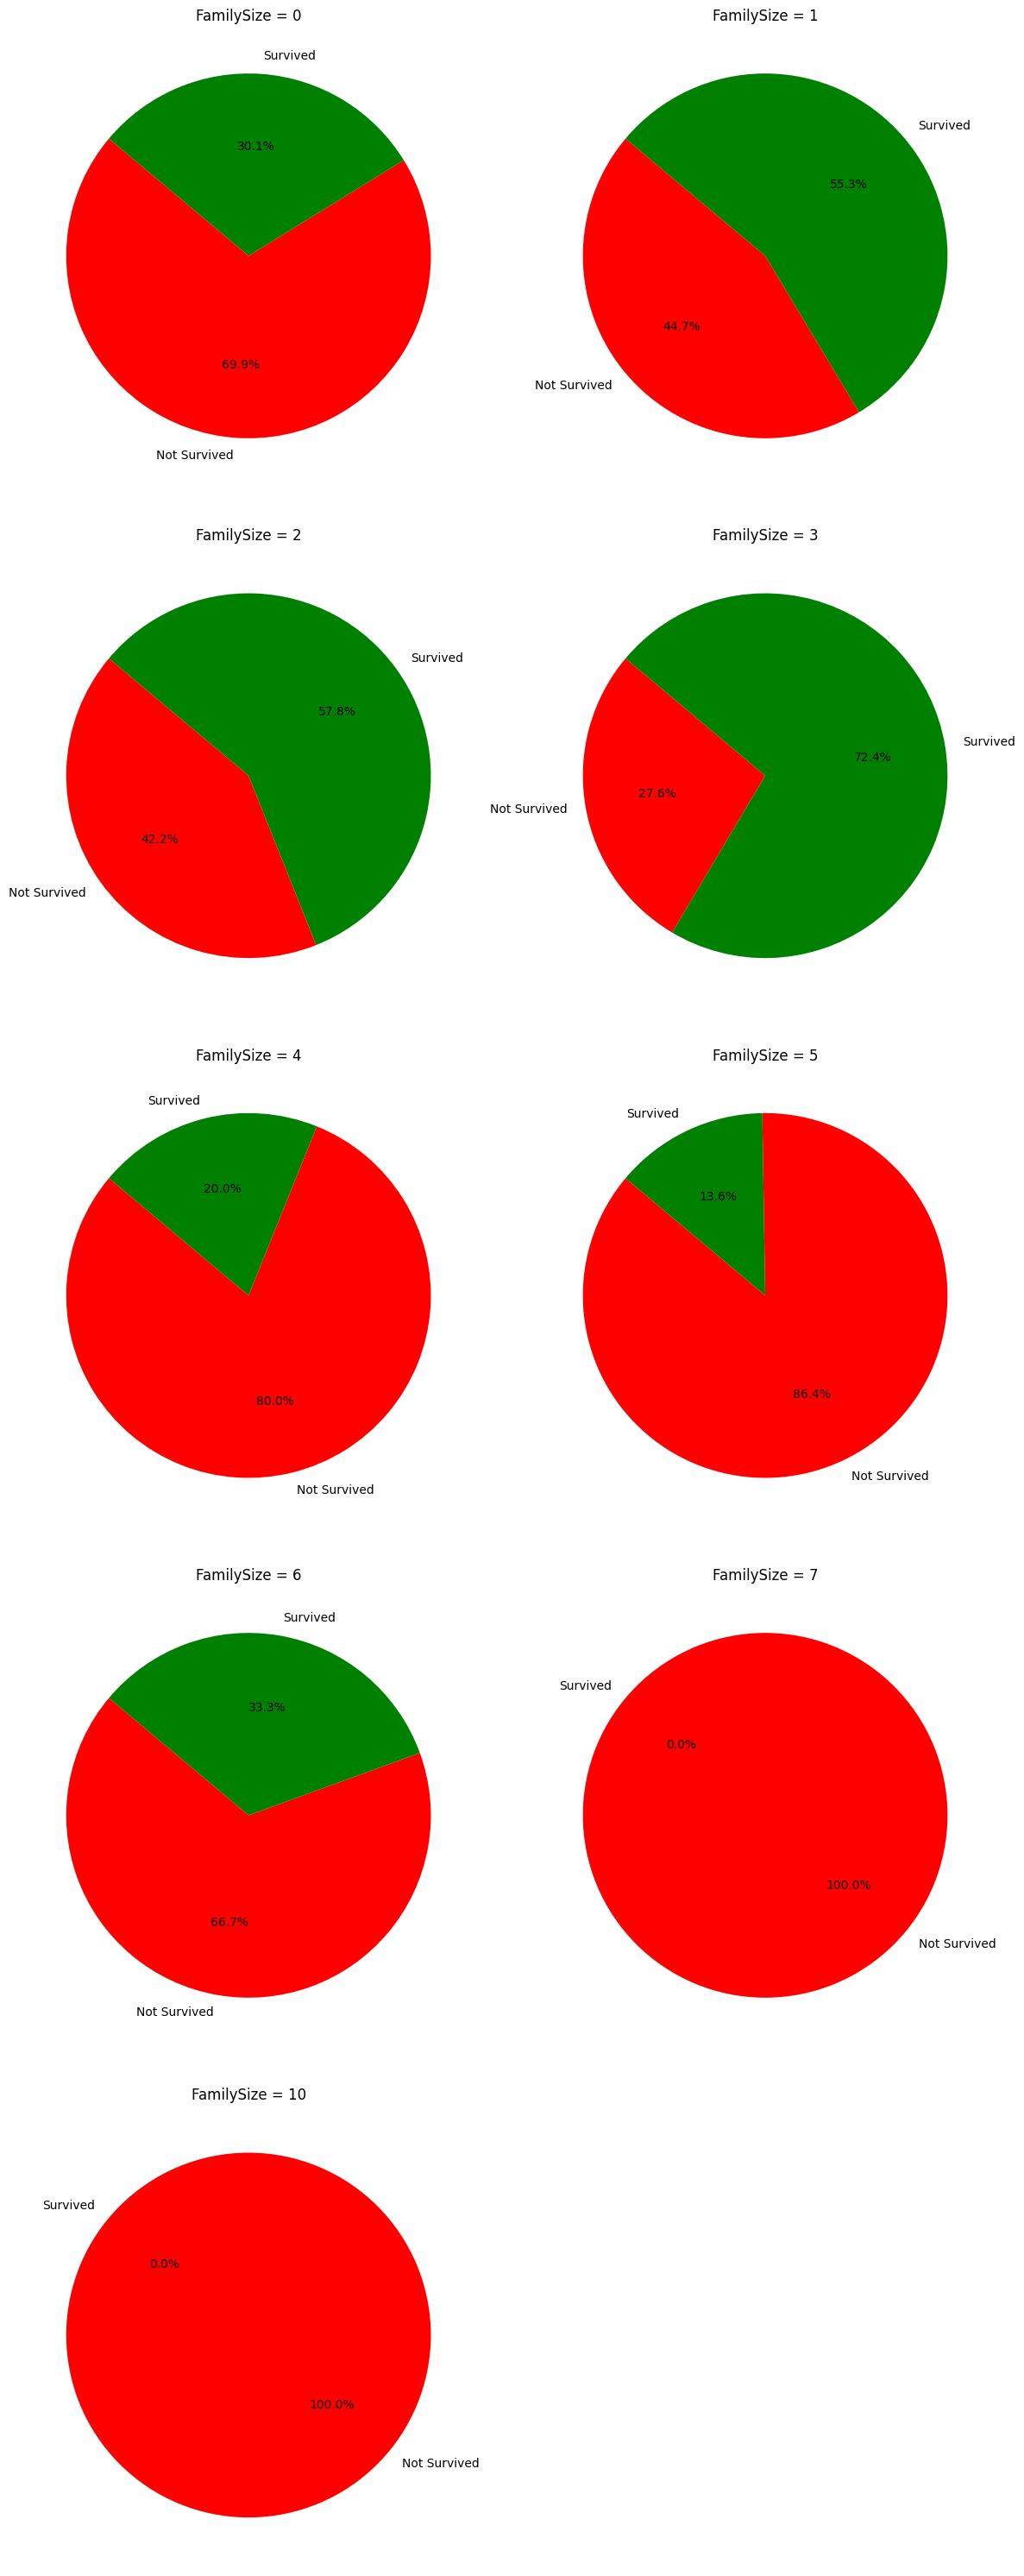

IsAlone


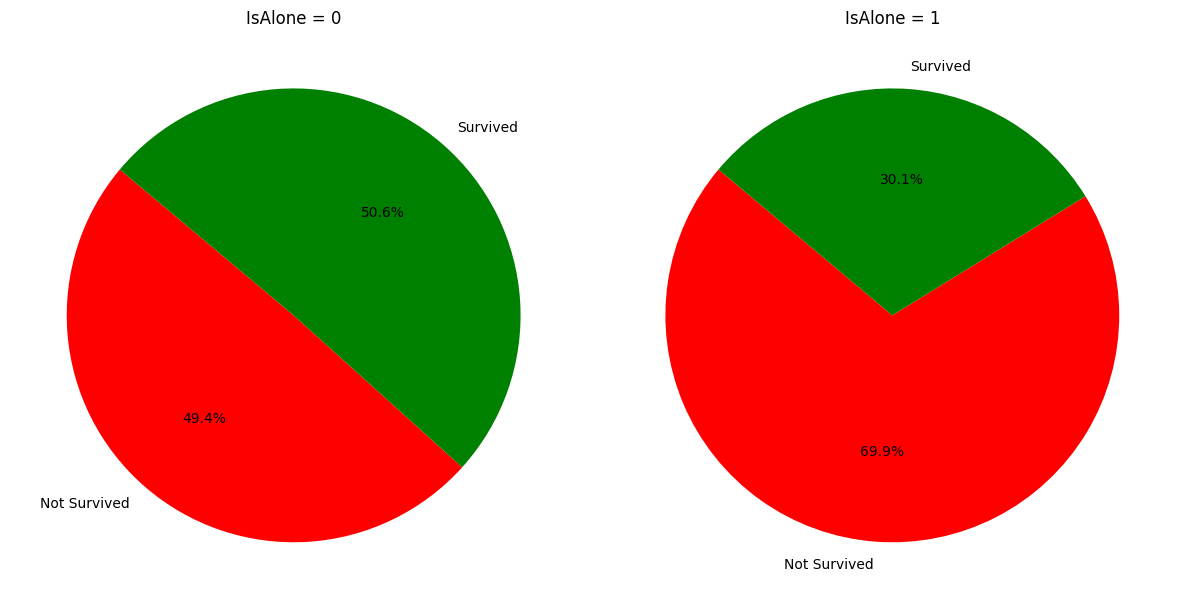

In [ ]:
import matplotlib.pyplot as plt

for column_name in ['FamilySize', 'IsAlone']:
    print(column_name)

    # Calculate survival distribution for each category in the column
    data = df_train.groupby([column_name, 'Survived']).size().unstack(fill_value=0)
    data.columns = ['Not Survived', 'Survived']

    # Create pie charts in pairs
    categories = data.index
    num_categories = len(categories)
    num_rows = (num_categories + 1) // 2  # Calculate number of rows needed

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, (survival_status, values) in enumerate(data.iterrows()):
        axes[i].pie(values, labels=['Not Survived', 'Survived'], autopct='%1.1f%%',
                    colors=['red', 'green'], startangle=140)
        axes[i].set_title(f"{column_name} = {survival_status}")

    # Hide unused subplots if the number of categories is odd
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Adjust layout for better spacing
    plt.tight_layout(w_pad=2, h_pad=3)
    plt.show()

In [ ]:
# calculate the mean age of male passengers in the 'df_train' dataset.
mean_male = df_train[df_train['Sex']=='male']['Age'].mean()
mean_male

30.72664459161148

In [ ]:
# calculate the mean age of بثmale passengers in the 'df_train' dataset.
mean_female = df_train[df_train['Sex']=='female']['Age'].mean()
mean_female

27.745173745173744

# Data Preprocessing

In [ ]:
# Feature engineering for train and test data
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train['IsAlone'] = (df_train['FamilySize'] == 0).astype(int)

df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']
df_test['IsAlone'] = (df_test['FamilySize'] == 0).astype(int)

# Define features and target for training and test sets
Y_train = df_train['Survived']
X_train = df_train.drop(['Name', 'PassengerId', 'Survived'], axis=1)

# Ensure the test target is matched correctly from the gender_submission.csv
Y_test = target['Survived']
X_test = df_test.drop(['Name', 'PassengerId'], axis=1)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      889 non-null    int64  
 1   Sex         889 non-null    object 
 2   Age         712 non-null    float64
 3   SibSp       889 non-null    int64  
 4   Parch       889 non-null    int64  
 5   Ticket      889 non-null    object 
 6   Fare        889 non-null    float64
 7   Cabin       202 non-null    object 
 8   Embarked    889 non-null    object 
 9   FamilySize  889 non-null    int64  
 10  IsAlone     889 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [ ]:
from sklearn.compose import make_column_selector as selector

num_col_selector = selector(dtype_exclude=object)
cat_col_selector = selector(dtype_include=object)

num_col, cat_col = num_col_selector(X_train), cat_col_selector(X_train)

make_column_selector Import: The function
make_column_selector is imported and aliased as selector to facilitate concise usage in the code.

Define Numeric Column Selector: num_col_selector = selector(dtype_exclude=object) creates a column selector to identify columns with numeric data types by excluding columns with object (categorical) data types.

Define Categorical Column Selector: cat_col_selector = selector(dtype_include=object) creates a column selector to identify columns with categorical data types by including only columns with the object data type.

Select Numeric and Categorical Columns:
num_col = num_col_selector(X_train) extracts the names of numeric columns from X_train.
cat_col = cat_col_selector(X_train) extracts the names of categorical columns from X_train.


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

encoder = OneHotEncoder(handle_unknown="ignore")
scaler = StandardScaler()

Importing Preprocessing Tools:

OneHotEncoder: Used to convert categorical variables into a binary (0/1) matrix representation by encoding each category as a one-hot vector.
StandardScaler: Used to standardize numeric features by removing the mean and scaling them to unit variance, ensuring features have a mean of 0 and a standard deviation of 1.
Initializing the Encoders:

encoder = OneHotEncoder(handle_unknown="ignore"):
Creates an instance of the OneHotEncoder.
The parameter handle_unknown="ignore" ensures that if new, unseen categories are encountered during transformation, they will be ignored instead of raising an error.
scaler = StandardScaler():
Creates an instance of the StandardScaler.
This scaler is applied to numeric features to make them comparable in magnitude, improving model performance and stability.

In [ ]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')


Importing SimpleImputer:

SimpleImputer is a class in Scikit-learn designed to fill in missing values (NaNs) in datasets with specified replacement strategies.
Numeric Data Imputer:

num_imputer = SimpleImputer(strategy='mean'):
Creates an imputer for numeric columns.
The strategy='mean' specifies that missing values will be replaced with the mean of the respective column.
Useful for handling missing data in continuous variables where the mean is a reasonable estimate.
Categorical Data Imputer:

cat_imputer = SimpleImputer(strategy='most_frequent'):
Creates an imputer for categorical columns.
The strategy='most_frequent' specifies that missing values will be replaced with the most common (mode) value in the respective column.
Ideal for handling missing data in categorical variables where the mode often represents a typical category.

In [ ]:
from sklearn.pipeline import make_pipeline

numeric_transformer = make_pipeline(num_imputer, scaler)
category_transformer = make_pipeline(cat_imputer, encoder)

Importing make_pipeline:

The make_pipeline function from Scikit-learn is used to construct sequential processing pipelines. Each pipeline executes a series of transformations in the order they are defined.
Creating the Numeric Transformer Pipeline:

numeric_transformer = make_pipeline(num_imputer, scaler):
This pipeline applies two transformations to numeric data:
num_imputer: Fills missing values with the column mean.
scaler: Standardizes the data to have a mean of 0 and a standard deviation of 1.
Together, these steps ensure that numeric data is clean (no missing values) and scaled appropriately for machine learning models.
Creating the Categorical Transformer Pipeline:

category_transformer = make_pipeline(cat_imputer, encoder):
This pipeline applies two transformations to categorical data:
cat_imputer: Fills missing values with the most frequent category (mode).
encoder: Converts categorical variables into a one-hot encoded format, transforming them into binary indicators.
These steps ensure that categorical data is clean (no missing values) and converted into a machine-readable format.

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([ ('num', numeric_transformer, num_col), ('cat', category_transformer, cat_col) ])

Importing ColumnTransformer:

The ColumnTransformer from Scikit-learn allows you to apply different transformations to specific columns in a dataset. It is particularly useful when handling mixed types of data (numeric and categorical).
Creating the Preprocessor:

preprocessor = ColumnTransformer():
Combines the numeric and categorical transformers into a single preprocessing object.
Defining the Transformation Pipeline:

The ColumnTransformer takes a list of tuples, where each tuple defines:
'num': A name for the numeric transformation pipeline.
numeric_transformer: The pipeline for numeric data (imputation and scaling).
num_col: The list of numeric column names identified earlier.
'cat': A name for the categorical transformation pipeline.
category_transformer: The pipeline for categorical data (imputation and one-hot encoding).
cat_col: The list of categorical column names identified earlier.

# Creating Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


model_KNN = make_pipeline(preprocessor, KNeighborsClassifier())
model_DTC = make_pipeline(preprocessor, DecisionTreeClassifier())
model_SVC = make_pipeline(preprocessor, SVC())
model_LR = make_pipeline(preprocessor, LogisticRegression())

1. Importing Classifiers:
The following classifiers are imported from Scikit-learn:
KNeighborsClassifier: A k-Nearest Neighbors model that predicts based on the closest data points in the feature space.
DecisionTreeClassifier: A decision tree model that splits data based on feature values to make predictions.
SVC: A Support Vector Classifier that finds a hyperplane to separate classes in the feature space.
LogisticRegression: A linear model used for binary classification problems based on logistic function.
2. Combining Preprocessing and Models into Pipelines:
The make_pipeline function is used to create a sequential pipeline that integrates the preprocessor (created earlier) and a machine learning model.
Each pipeline ensures the raw data is preprocessed (numeric and categorical transformations) before being fed into the corresponding model.
Pipelines Defined:
model_KNN:
Combines the preprocessor with a k-Nearest Neighbors classifier.
model_DTC:
Combines the preprocessor with a Decision Tree classifier.
model_SVC:
Combines the preprocessor with a Support Vector Classifier.
model_LR:
Combines the preprocessor with a Logistic Regression model.


In [ ]:
model_KNN.fit(X_train, Y_train)
model_DTC.fit(X_train, Y_train)
model_SVC.fit(X_train, Y_train)
model_LR.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare',
                                                   'FamilySize', 'IsAlone']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Ticket', 'Cabin',
                                                   'Embarked'])])),
                ('logisticregression', LogisticRegression())])

model_KNN.fit(X_train, Y_train):

Trains the k-Nearest Neighbors classifier (model_KNN) on the training dataset (X_train and Y_train).
The fit() method:
Applies the preprocessing steps defined in the preprocessor.
Trains the KNeighborsClassifier on the preprocessed data.
model_DTC.fit(X_train, Y_train):

Trains the Decision Tree classifier (model_DTC) on the training dataset.
The DecisionTreeClassifier learns decision rules based on the features in the preprocessed data.
model_SVC.fit(X_train, Y_train):

Trains the Support Vector Classifier (model_SVC) on the training dataset.
The SVC learns a hyperplane that separates classes in the feature space.
model_LR.fit(X_train, Y_train):

Trains the Logistic Regression model (model_LR) on the training dataset.
Logistic Regression estimates the probability of class membership for each data point.
Key Points:
Input Data:

X_train: The feature set from the training dataset.
Y_train: The target labels (e.g., survival outcomes in the Titanic dataset).

In [ ]:
pd.DataFrame(zip([model_KNN.score(X_test, Y_test)],
                 [model_DTC.score(X_test, Y_test)],
                 [model_SVC.score(X_test, Y_test)],
                 [model_LR.score(X_test, Y_test)]
                ),
             columns=['K-Neighbors Classifier',
                      'Decision Tree Classifier',
                      'Support Vector Classifier',
                      'Logistic Regression']
            )

,K-Neighbors Classifier,Decision Tree Classifier,Support Vector Classifier,Logistic Regression
0,0.844498,0.87799,0.952153,0.947368


model_KNN.score(X_test, Y_test):

Calculates the accuracy score of the KNeighborsClassifier on the test dataset (X_test and Y_test).
The .score() method evaluates the proportion of correctly predicted outcomes for the test data.
model_DTC.score(X_test, Y_test):

Computes the accuracy score for the DecisionTreeClassifier.
model_SVC.score(X_test, Y_test):

Computes the accuracy score for the Support Vector Classifier.
model_LR.score(X_test, Y_test):

Computes the accuracy score for the Logistic Regression model.
zip() Function:
Combines the scores of all models into a single iterable.
Each score is wrapped in a list to align with the structure of the zip function.


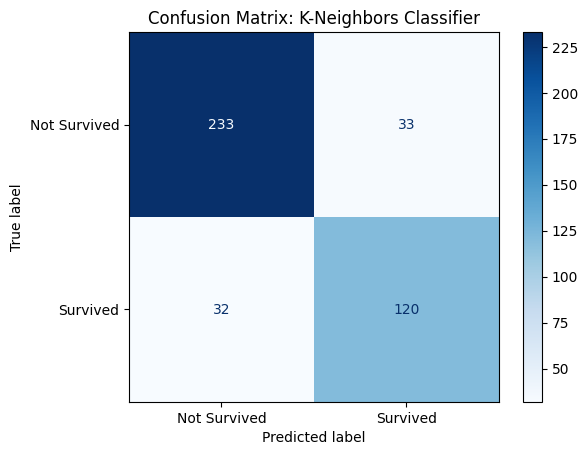

Classification Report for K-Neighbors Classifier:

              precision    recall  f1-score   support

Not Survived       0.88      0.88      0.88       266
    Survived       0.78      0.79      0.79       152

    accuracy                           0.84       418
   macro avg       0.83      0.83      0.83       418
weighted avg       0.84      0.84      0.84       418





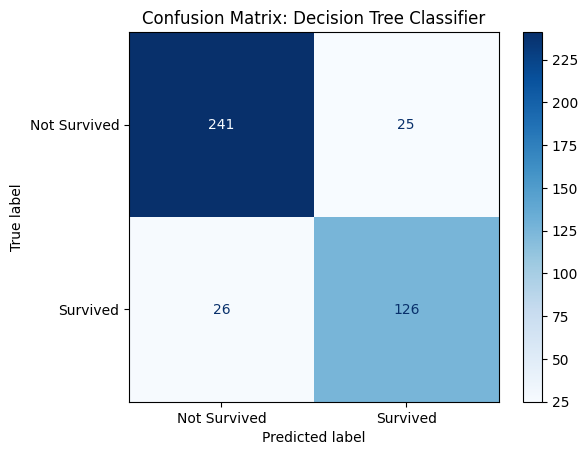

Classification Report for Decision Tree Classifier:

              precision    recall  f1-score   support

Not Survived       0.90      0.91      0.90       266
    Survived       0.83      0.83      0.83       152

    accuracy                           0.88       418
   macro avg       0.87      0.87      0.87       418
weighted avg       0.88      0.88      0.88       418





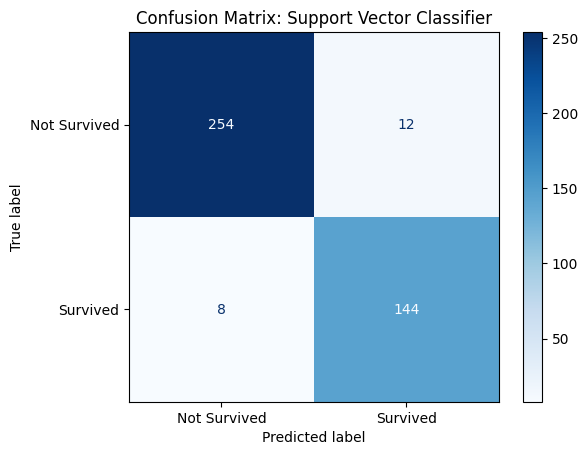

Classification Report for Support Vector Classifier:

              precision    recall  f1-score   support

Not Survived       0.97      0.95      0.96       266
    Survived       0.92      0.95      0.94       152

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418





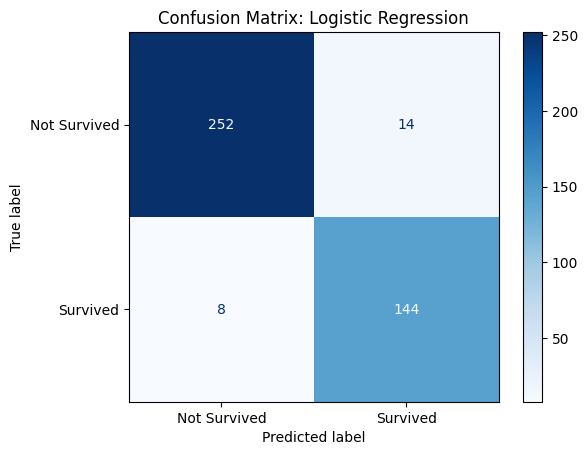

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

Not Survived       0.97      0.95      0.96       266
    Survived       0.91      0.95      0.93       152

    accuracy                           0.95       418
   macro avg       0.94      0.95      0.94       418
weighted avg       0.95      0.95      0.95       418



                       Model  Accuracy
0     K-Neighbors Classifier  0.844498
1   Decision Tree Classifier  0.877990
2  Support Vector Classifier  0.952153
3        Logistic Regression  0.947368


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Evaluate models and display confusion matrix for each
models = {
    'K-Neighbors Classifier': model_KNN,
    'Decision Tree Classifier': model_DTC,
    'Support Vector Classifier': model_SVC,
    'Logistic Regression': model_LR
}

results = []
for model_name, model in models.items():
    # Predict on test set
    Y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = model.score(X_test, Y_test)
    results.append((model_name, accuracy))

    # Confusion Matrix
    cm = confusion_matrix(Y_test, Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

    # Classification Report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(Y_test, Y_pred, target_names=['Not Survived', 'Survived']))
    print("\n")

# Display accuracy scores for all models
accuracy_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
print(accuracy_df)